In [ ]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import *
from importlib import reload
from Tomography import utility

reload(utility)
# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
provider = IBMQ.load_account()


Create simple bell state

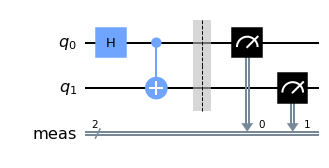

In [10]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()
bell.draw(output='mpl');

Execute

Retrieved from memory


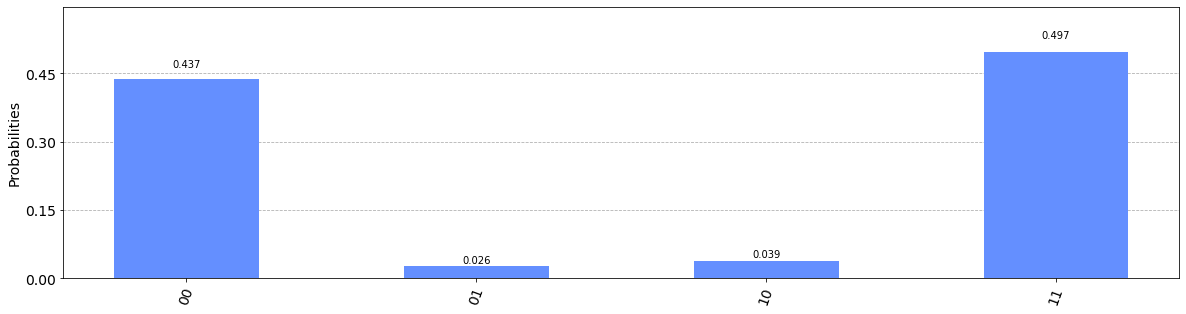

In [11]:
bell_job = utility.execute(bell, 'ibmq_santiago', "2qubit-bell_state", shots=5000)
plot_histogram(bell_job.result().get_counts(), figsize=(20, 5));

Execute - retrieves from memory

Retrieved from memory


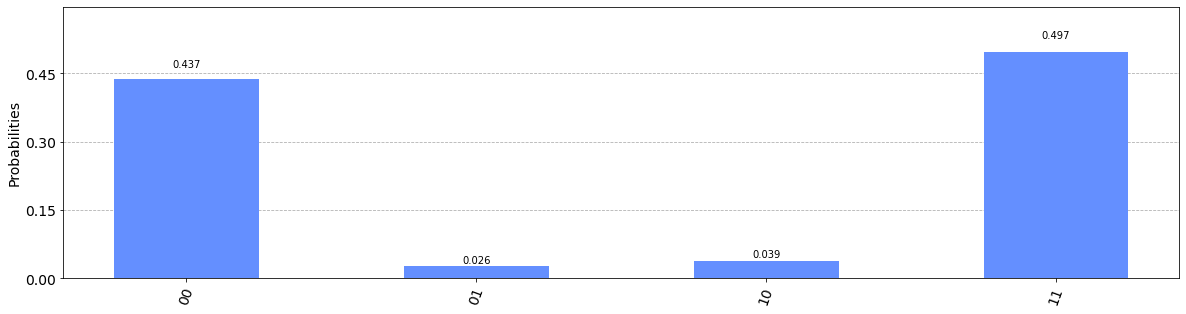

In [12]:
bell_job_again = utility.execute(bell, 'ibmq_santiago', "2qubit", shots=5000)
plot_histogram(bell_job_again.result().get_counts(), figsize=(20, 5));

retrieve from name

Retrieved from memory


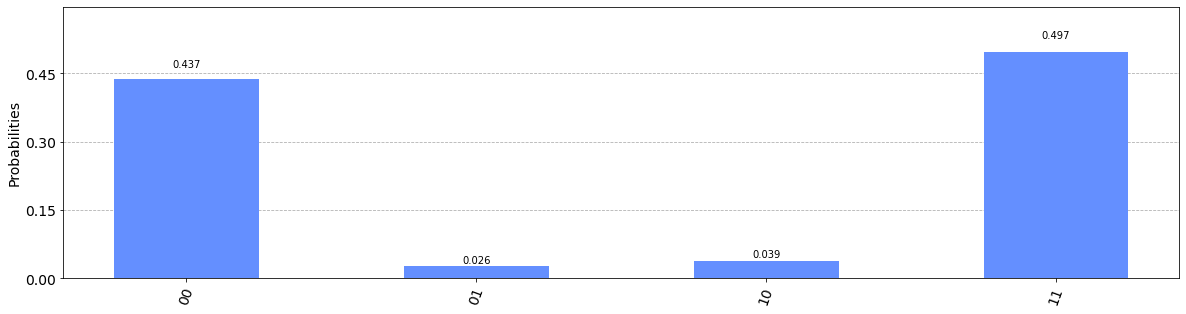

In [13]:
bell_job_ret = utility.retrieve("2qubit-bell_state")
plot_histogram(bell_job_ret.result().get_counts(), figsize=(20, 5));

retrieve from different name

Retrieved from memory


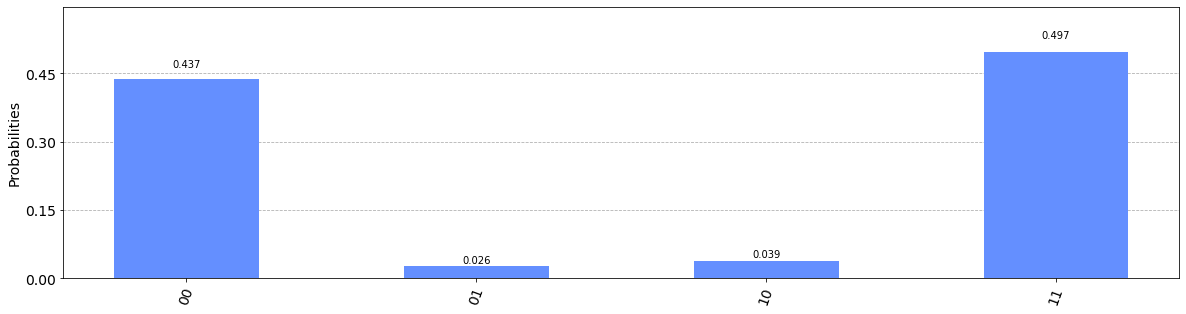

In [14]:
bell_job_ret = utility.retrieve("2qubit")
plot_histogram(bell_job_ret.result().get_counts(), figsize=(20, 5));

retrieve from wrong name

In [15]:
bell_job_ret = utility.retrieve("3qubit")
plot_histogram(bell_job_ret.result().get_counts(), figsize=(20, 5));

NameError: No such experiment

manually save job

In [21]:
from qiskit.tools import job_monitor
import qiskit
manual_job = qiskit.execute(bell, provider.get_backend('ibmq_manila'), shots=5000)
job_monitor(manual_job)
utility.save_job(manual_job, "manual_job")

Job Status: job has successfully run
Job Status: job has successfully run


In [ ]:
##retrieve from manual
man_ret = utility.retrieve("manual_job")
plot_histogram(man_ret.result().get_counts(), figsize=(20, 5));

In [ ]:
a = 2
b = 3